In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/lending_club/loan.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,...,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,...,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,...,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,...,36151.0,5000.0,44984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,NaN,NaN,12.0,0.0,829,3.6,26.0,w,29339.02,...,29674.0,9300.0,32332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['issue_d'].value_counts(dropna=False)

,count
issue_d,
Mar-2016,61992
Oct-2015,48631
May-2018,46311
Oct-2018,46305
Aug-2018,46079
...,...
Aug-2007,74
Jul-2007,63
Sep-2008,57


In [ ]:
df['loan_status'].value_counts(dropna=False)

,count
loan_status,
Fully Paid,1041952
Current,919695
Charged Off,261655
Late (31-120 days),21897
In Grace Period,8952
Late (16-30 days),3737
Does not meet the credit policy. Status:Fully Paid,1988
Does not meet the credit policy. Status:Charged Off,761
Default,31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [ ]:
df.shape

(2260668, 145)

In [ ]:
missing_fractions = df.isnull().mean().sort_values(ascending=False)

In [ ]:
missing_fractions.head(30)

,0
id,1.000000
member_id,1.000000
url,1.000000
orig_projected_additional_accrued_interest,0.996273
hardship_amount,0.995305
hardship_dpd,0.995305
hardship_loan_status,0.995305
deferral_term,0.995305
hardship_end_date,0.995305
hardship_status,0.995305


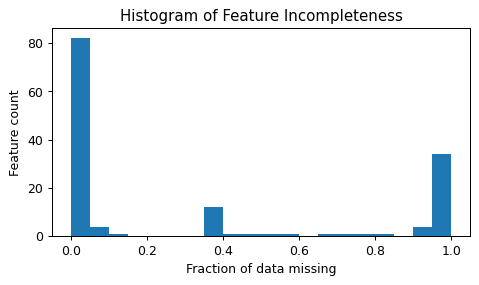

In [ ]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')
plt.show()

In [ ]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.30].index))
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'id', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_o

In [ ]:
len(drop_list)

58

In [ ]:
df_droped=df
df_droped.drop(axis=1,labels=drop_list,inplace=True)

In [ ]:
df_droped.shape

(2260668, 87)

In [ ]:
print(sorted(df_droped.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open

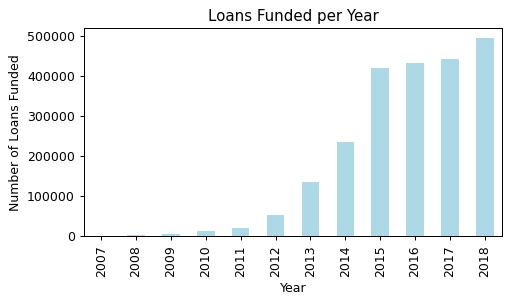

In [ ]:
plt.figure(figsize=(6,3), dpi=90)
df_droped['issue_d'] = pd.to_datetime(df_droped['issue_d'])
df_droped['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='lightblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')
plt.show()

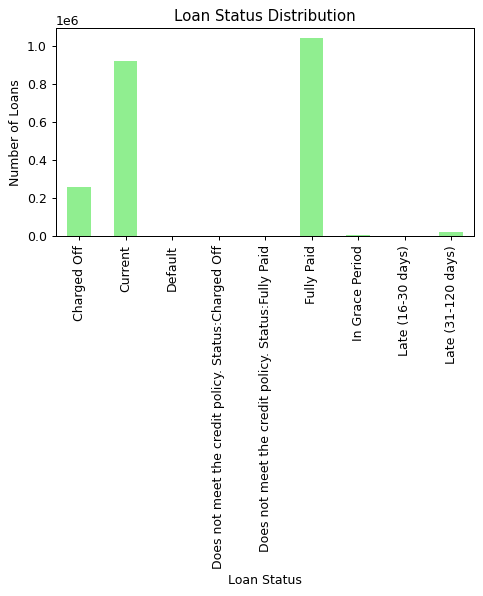

In [ ]:
plt.figure(figsize=(6,3), dpi=90)
df_droped['loan_status'].value_counts().sort_index().plot.bar(color='lightgreen')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.title('Loan Status Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

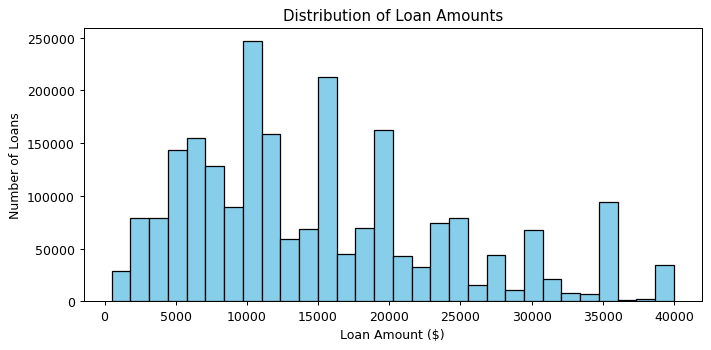

In [ ]:
plt.figure(figsize=(8,4), dpi=90)
plt.hist(df_droped['loan_amnt'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Amounts')
plt.tight_layout()
plt.show()

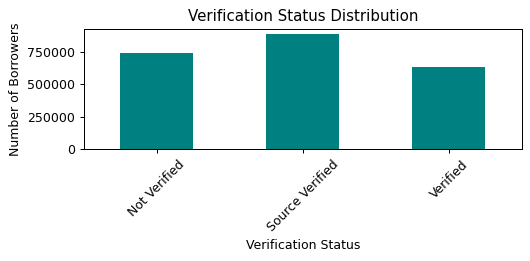

In [ ]:
plt.figure(figsize=(6,3), dpi=90)
df_droped['verification_status'].value_counts().sort_index().plot.bar(color='teal')
plt.xlabel('Verification Status')
plt.ylabel('Number of Borrowers')
plt.title('Verification Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_droped.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,...,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,...,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,...,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,4.0,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,...,18383.0,13800.0,0.0,0.0,0.0,87.0,92.0,15.0,14.0,2.0,77.0,14.0,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,168.07,118.64,0.0,...,30505.0,1239.0,75.2,0.0,0.0,62.0,154.0,64.0,5.0,3.0,64.0,5.0,0.0,1.0,2.0,1.0,2.0,7.0,2.0,3.0,2.0,10.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,660.98,762.23,0.0,...,9667.0,8471.0,8.9,0.0,0.0,53.0,216.0,2.0,2.0,2.0,2.0,13.0,0.0,2.0,2.0,3.0,8.0,9.0,6.0,15.0,2.0,12.0,0.0,0.0,0.0,5.0,92.3,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [ ]:
keep_list = [ 'loan_status','annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership',  'installment', 'int_rate', 'loan_amnt',  'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies',  'revol_bal', 'revol_util', 'sub_grade', 'total_acc', 'verification_status']

In [ ]:
len(keep_list)

19

In [ ]:
drop_list = [col for col in df_droped.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'term', 'emp_title', 'emp_length', 'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_

In [ ]:
len(drop_list)

70

In [ ]:
df_droped.drop(axis=1,labels=drop_list,inplace=True)

In [ ]:
df_droped

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,2500,13.56,84.92,C,C1,RENT,55000.0,Not Verified,Current,18.24,9.0,1.0,4341,10.3,34.0,0.0,1.0
1,30000,18.94,777.23,D,D2,MORTGAGE,90000.0,Source Verified,Current,26.52,13.0,1.0,12315,24.2,44.0,3.0,1.0
2,5000,17.97,180.69,D,D1,MORTGAGE,59280.0,Source Verified,Current,10.51,8.0,0.0,4599,19.1,13.0,2.0,0.0
3,4000,18.94,146.51,D,D2,MORTGAGE,92000.0,Source Verified,Current,16.74,10.0,0.0,5468,78.1,13.0,3.0,0.0
4,30000,16.14,731.78,C,C4,MORTGAGE,57250.0,Not Verified,Current,26.35,12.0,0.0,829,3.6,26.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,12000,14.08,279.72,C,C3,MORTGAGE,58000.0,Not Verified,Current,20.88,12.0,0.0,9592,39.2,34.0,2.0,0.0
2260664,12000,25.82,358.01,E,E4,MORTGAGE,30000.0,Not Verified,Fully Paid,19.28,10.0,0.0,3497,20.2,26.0,4.0,0.0
2260665,10000,11.99,332.10,B,B5,OWN,64000.0,Source Verified,Current,12.96,6.0,0.0,7094,70.9,13.0,3.0,0.0
2260666,12000,21.45,327.69,D,D5,RENT,60000.0,Not Verified,Current,30.82,8.0,0.0,12927,34.9,17.0,0.0,0.0


In [ ]:
df_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             int64  
 1   int_rate              float64
 2   installment           float64
 3   grade                 object 
 4   sub_grade             object 
 5   home_ownership        object 
 6   annual_inc            float64
 7   verification_status   object 
 8   loan_status           object 
 9   dti                   float64
 10  open_acc              float64
 11  pub_rec               float64
 12  revol_bal             int64  
 13  revol_util            float64
 14  total_acc             float64
 15  mort_acc              float64
 16  pub_rec_bankruptcies  float64
dtypes: float64(10), int64(2), object(5)
memory usage: 293.2+ MB


In [ ]:
def df_object_to_num(df_dropped):
    df_num = df_dropped.copy()
    col_drop_list = ['emp_title']
    df_num['mort_acc'] = np.where(df_num['mort_acc'].isnull(), 0,df_num['mort_acc'])
    df_num['pub_rec_bankruptcies'] = np.where(df_num['pub_rec_bankruptcies']>0, 1, 0)
    df_num['pub_rec'] = np.where(df_num['pub_rec']>0, 1, 0)
    term_to_int = {' 36 months': 1,
                   ' 60 months': 2}
    grade_to_int = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1)))
    sub_grade_sorted = {'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4,
                        'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9,
                        'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14,
                        'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19,
                        'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24,
                        'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29,
                        'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34}
    home_to_int = {'MORTGAGE': 4, 'RENT': 3, 'OWN': 5,'ANY': 2,'OTHER': 1, 'NONE':0 }
    ver_stat_to_int = {'Source Verified':2,'Verified': 1,'Not Verified': 0}
    loan_status_to_int={'Fully Paid':0,'Current' :0,'Charged Off':1,'Late (31-120 days)':1,'In Grace Period':0,
                        'Late (16-30 days)':1,'Does not meet the credit policy. Status:Fully Paid':0,
                        'Does not meet the credit policy. Status:Charged Off':1,'Default':1    }
    df_num['verification_status'] = np.where(df_num['verification_status'].isnull(), 'Not Verified',df_num['verification_status'])
    df_num.replace({'term': term_to_int,
                    'grade':grade_to_int,
                    'sub_grade': sub_grade_sorted,
                    'home_ownership':home_to_int,
                    'verification_status':ver_stat_to_int,
                   'verification_status_joint':ver_stat_to_int,
                   'loan_status':loan_status_to_int}, inplace=True)
    return df_num

In [ ]:
df_new = df_object_to_num(df_droped)
df_new.head()
df_new['loan_status'].value_counts(dropna=False)

,count
loan_status,
0,1972587
1,288081


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             int64  
 1   int_rate              float64
 2   installment           float64
 3   grade                 int64  
 4   sub_grade             int64  
 5   home_ownership        int64  
 6   annual_inc            float64
 7   verification_status   int64  
 8   loan_status           int64  
 9   dti                   float64
 10  open_acc              float64
 11  pub_rec               int64  
 12  revol_bal             int64  
 13  revol_util            float64
 14  total_acc             float64
 15  mort_acc              float64
 16  pub_rec_bankruptcies  int64  
dtypes: float64(8), int64(9)
memory usage: 293.2 MB


In [ ]:
df_new

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,2500,13.56,84.92,5,24,3,55000.0,0,0,18.24,9.0,1,4341,10.3,34.0,0.0,1
1,30000,18.94,777.23,4,18,4,90000.0,2,0,26.52,13.0,1,12315,24.2,44.0,3.0,1
2,5000,17.97,180.69,4,19,4,59280.0,2,0,10.51,8.0,0,4599,19.1,13.0,2.0,0
3,4000,18.94,146.51,4,18,4,92000.0,2,0,16.74,10.0,0,5468,78.1,13.0,3.0,0
4,30000,16.14,731.78,5,21,4,57250.0,0,0,26.35,12.0,0,829,3.6,26.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,12000,14.08,279.72,5,22,4,58000.0,0,0,20.88,12.0,0,9592,39.2,34.0,2.0,0
2260664,12000,25.82,358.01,3,11,4,30000.0,0,0,19.28,10.0,0,3497,20.2,26.0,4.0,0
2260665,10000,11.99,332.10,6,25,5,64000.0,2,0,12.96,6.0,0,7094,70.9,13.0,3.0,0
2260666,12000,21.45,327.69,4,15,3,60000.0,0,0,30.82,8.0,0,12927,34.9,17.0,0.0,0


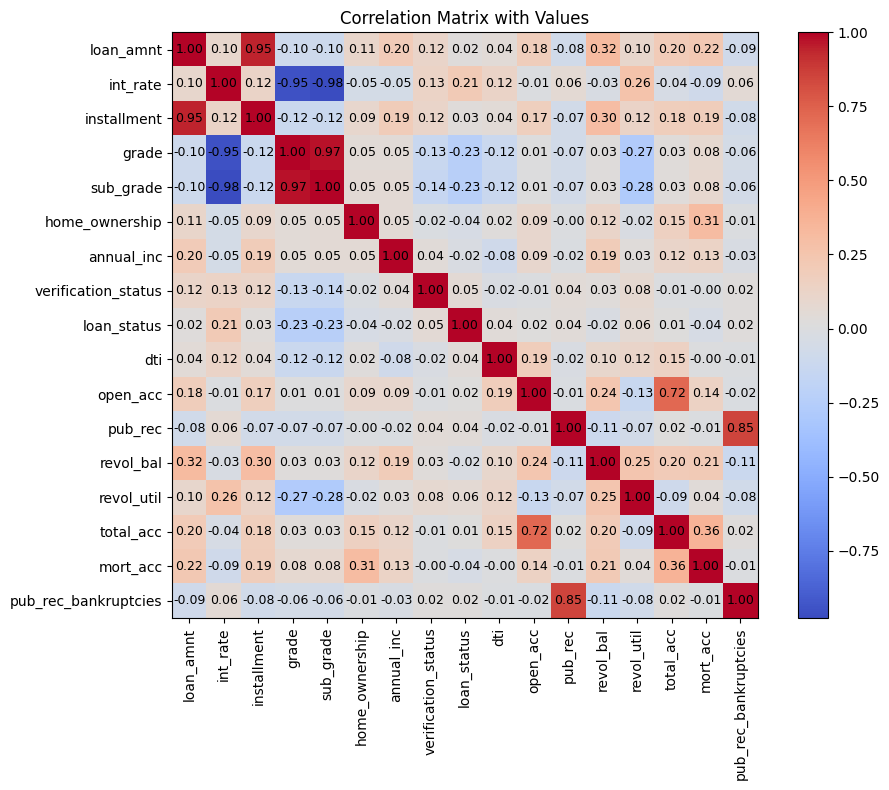

In [ ]:
corr = df_new.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation='nearest', cmap='coolwarm')
plt.colorbar()

plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        value = corr.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', fontsize=9, color='black')

plt.title("Correlation Matrix with Values")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

numeric_cols = [col for col in df_new.columns if pd.api.types.is_numeric_dtype(df_new[col])]

scaler = RobustScaler()
df_new[numeric_cols] = scaler.fit_transform(df_new[numeric_cols])

df_new.head()

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,-0.866667,0.144615,-0.857757,0.0,0.000,-1.0,-0.212766,-0.5,0.0,0.031746,-0.333333,1.0,-0.488458,-1.055409,0.7500,-0.5,1.0
1,1.425000,0.972308,1.168496,-1.0,-0.750,0.0,0.531915,0.5,0.0,0.688889,0.333333,1.0,0.069320,-0.688654,1.3750,1.0,1.0
2,-0.658333,0.823077,-0.577458,-1.0,-0.625,0.0,-0.121702,0.5,0.0,-0.581746,-0.500000,0.0,-0.470411,-0.823219,-0.5625,0.5,0.0
3,-0.741667,0.972308,-0.677496,-1.0,-0.750,0.0,0.574468,0.5,0.0,-0.087302,-0.166667,0.0,-0.409625,0.733509,-0.5625,1.0,0.0
4,1.425000,0.541538,1.035473,0.0,-0.375,0.0,-0.164894,-0.5,0.0,0.675397,0.166667,0.0,-0.734121,-1.232190,0.2500,0.5,0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df_new = df_new.sample(frac=1, random_state=13).reset_index(drop=True)

n_chunks = 5
chunk_size = len(df_new) // n_chunks

df_chunks = [df_new.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df_new) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df_new.iloc[n_chunks*chunk_size:]], axis=0)

for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")

target_col = "loan_status"

for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")

    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]

    class_counts = y.value_counts()
    single_sample_classes = class_counts[class_counts == 1].index

    if len(single_sample_classes) > 0:
        mask = ~y.isin(single_sample_classes)
        X = X[mask]
        y = y[mask]
        print(f"  Removed {len(single_sample_classes)} classes with only one member from Chunk {i+1} for stratification.")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )

    rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced"
    )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Chunk 1: 452133 rows
Chunk 2: 452133 rows
Chunk 3: 452133 rows
Chunk 4: 452133 rows
Chunk 5: 452136 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.8731
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78964
         1.0       0.48      0.01      0.02     11463

    accuracy                           0.87     90427
   macro avg       0.67      0.50      0.48     90427
weighted avg       0.82      0.87      0.82     90427


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.8735
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     79015
         1.0       0.46      0.01      0.02     11412

    accuracy                           0.87     90427
   macro avg       0.67      0.51      0.48     90427
weighted avg       0.82      0.87      0.82     90427


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.8721
Classification Report:
          

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df_new = df_new.sample(frac=1, random_state=13).reset_index(drop=True)

n_chunks = 5
chunk_size = len(df_new) // n_chunks

df_chunks = [df_new.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df_new) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df_new.iloc[n_chunks*chunk_size:]], axis=0)

for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")

target_col = "loan_status"

for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")

    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )

    rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced"
    )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Chunk 1: 452133 rows
Chunk 2: 452133 rows
Chunk 3: 452133 rows
Chunk 4: 452133 rows
Chunk 5: 452136 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.8734
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78995
         1.0       0.47      0.01      0.02     11432

    accuracy                           0.87     90427
   macro avg       0.67      0.51      0.48     90427
weighted avg       0.82      0.87      0.82     90427


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.8721
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78869
         1.0       0.49      0.01      0.03     11558

    accuracy                           0.87     90427
   macro avg       0.68      0.51      0.48     90427
weighted avg       0.82      0.87      0.82     90427


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.8729
Classification Report:
          

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

df_new = df_new.sample(frac=1, random_state=13).reset_index(drop=True)

n_chunks = 5
chunk_size = len(df_new) // n_chunks

df_chunks = [df_new.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df_new) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df_new.iloc[n_chunks*chunk_size:]], axis=0)

for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")

target_col = "loan_status"

for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")

    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]

    class_counts = y.value_counts()
    single_sample_classes = class_counts[class_counts == 1].index

    if len(single_sample_classes) > 0:
        mask = ~y.isin(single_sample_classes)
        X = X[mask]
        y = y[mask]
        print(f"  Removed {len(single_sample_classes)} classes with only one member from Chunk {i+1} for stratification.")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )

    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced"
    )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Chunk 1: 452133 rows
Chunk 2: 452133 rows
Chunk 3: 452133 rows
Chunk 4: 452133 rows
Chunk 5: 452136 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.8724
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78952
         1.0       0.41      0.01      0.03     11475

    accuracy                           0.87     90427
   macro avg       0.64      0.51      0.48     90427
weighted avg       0.82      0.87      0.82     90427


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.8715
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78828
         1.0       0.46      0.01      0.02     11599

    accuracy                           0.87     90427
   macro avg       0.67      0.51      0.48     90427
weighted avg       0.82      0.87      0.81     90427


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.8721
Classification Report:
          

The `dropna()` method removes rows or columns with missing values (NaNs). By default, it removes rows (`axis=0`) where *any* column has a NaN value (`how='any'`).

If you want to fill NaN values instead of removing them, you can use `fillna()` with a specified value or a statistical measure like the mean or median. Let me know if you'd prefer to see that option!

In [ ]:
df_new_cleaned = df_new.dropna()
display(df_new_cleaned.head())
print(f"Original DataFrame shape: {df_new.shape}")
print(f"Cleaned DataFrame shape: {df_new_cleaned.shape}")

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,0.285417,0.518462,0.573272,-1.0,-0.750,1.0,-0.553191,0.5,1.0,1.736508,0.666667,0.0,-0.150951,0.329815,0.4375,-0.5,0.0
1,-0.825000,0.969231,-0.784792,-1.0,-1.000,-1.0,-0.872340,0.0,0.0,0.143651,-0.666667,0.0,-0.587927,0.506596,-0.3750,-0.5,0.0
2,-0.491667,0.018462,-0.418533,0.0,0.000,-1.0,-0.744681,0.5,0.0,-0.761905,1.166667,0.0,-0.354435,0.274406,0.0625,-0.5,0.0
3,0.591667,0.287692,0.908303,0.0,-0.375,-1.0,0.106383,0.0,0.0,0.611111,2.500000,0.0,0.789102,-0.530343,0.7500,0.0,0.0
4,0.972917,-0.572308,1.177598,2.0,0.750,-1.0,-0.212766,0.5,0.0,0.465873,0.666667,0.0,2.829673,0.277045,0.4375,0.0,0.0


Original DataFrame shape: (2260668, 17)
Cleaned DataFrame shape: (2257159, 17)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

df_new_cleaned= df_new_cleaned.sample(frac=1, random_state=13).reset_index(drop=True)

n_chunks = 5
chunk_size = len(df_new_cleaned) // n_chunks

df_chunks = [df_new_cleaned.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df_new_cleaned) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df_new_cleaned.iloc[n_chunks*chunk_size:]], axis=0)

for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")

target_col = "loan_status"

for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")

    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]

    class_counts = y.value_counts()
    single_sample_classes = class_counts[class_counts == 1].index

    if len(single_sample_classes) > 0:
        mask = ~y.isin(single_sample_classes)
        X = X[mask]
        y = y[mask]
        print(f"  Removed {len(single_sample_classes)} classes with only one member from Chunk {i+1} for stratification.")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )

    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced"
    )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Chunk 1: 451431 rows
Chunk 2: 451431 rows
Chunk 3: 451431 rows
Chunk 4: 451431 rows
Chunk 5: 451435 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.8718
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78737
         1.0       0.46      0.01      0.02     11550

    accuracy                           0.87     90287
   macro avg       0.67      0.50      0.48     90287
weighted avg       0.82      0.87      0.82     90287


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.8732
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78870
         1.0       0.45      0.01      0.02     11417

    accuracy                           0.87     90287
   macro avg       0.66      0.51      0.48     90287
weighted avg       0.82      0.87      0.82     90287


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.8721
Classification Report:
          

In [ ]:
df_new_cleaned = df_new_cleaned.sample(frac=1, random_state=13).reset_index(drop=True)
n_chunks = 5
chunk_size = len(df_new) // n_chunks
df_chunks = [df_new.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df_new) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df_new_cleaned.iloc[n_chunks*chunk_size:]], axis=0)
for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")
target_col = "loan_status"
chunk_accuracies = []
all_y_test = []
all_y_pred = []
for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")
    for col in chunk.select_dtypes(include=np.number).columns:
        if chunk[col].isnull().any():
            median_val = chunk[col].median()
            chunk[col].fillna(median_val, inplace=True)
    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    lr = LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        n_jobs=-1,
        random_state=13
    )
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    chunk_accuracies.append(acc)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)
for idx, acc in enumerate(chunk_accuracies):
    print(f"Chunk {idx+1} Test Accuracy: {acc:.4f}")
overall_acc = accuracy_score(all_y_test, all_y_pred)
print(f"\n=== Overall Accuracy on all chunks combined: {overall_acc:.4f} ===")

Chunk 1: 452133 rows
Chunk 2: 452133 rows
Chunk 3: 452133 rows
Chunk 4: 452133 rows
Chunk 5: 452133 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.6533
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77     78952
         1.0       0.21      0.64      0.32     11475

    accuracy                           0.65     90427
   macro avg       0.57      0.65      0.54     90427
weighted avg       0.84      0.65      0.71     90427


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.6565
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.66      0.77     78828
         1.0       0.22      0.65      0.33     11599

    accuracy                           0.66     90427
   macro avg       0.57      0.65      0.55     90427
weighted avg       0.84      0.66      0.71     90427


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.6561
Classification Report:
          

In [ ]:
df = df_new_cleaned.sample(frac=1, random_state=13).reset_index(drop=True)
n_chunks = 5
chunk_size = len(df) // n_chunks
df_chunks = [df.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df.iloc[n_chunks*chunk_size:]], axis=0)
for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")
target_col = "loan_status"
chunk_accuracies = []
all_y_test = []
all_y_pred = []
for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")
    num_cols = chunk.select_dtypes(include=np.number).columns
    for col in num_cols:
        if chunk[col].isnull().any():
            chunk[col] = chunk[col].fillna(chunk[col].median())
    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    xgb = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        scale_pos_weight=1,
        random_state=13,
        n_jobs=-1
    )
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    chunk_accuracies.append(acc)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)
print("\n=== Chunk Accuracies ===")
for idx, acc in enumerate(chunk_accuracies):
    print(f"Chunk {idx+1}: {acc:.4f}")
overall_acc = accuracy_score(all_y_test, all_y_pred)
print(f"\n=== Overall Accuracy Across All Chunks: {overall_acc:.4f} ===")

Chunk 1: 451431 rows
Chunk 2: 451431 rows
Chunk 3: 451431 rows
Chunk 4: 451431 rows
Chunk 5: 451435 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.8729
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78821
         1.0       0.49      0.01      0.02     11466

    accuracy                           0.87     90287
   macro avg       0.68      0.50      0.48     90287
weighted avg       0.82      0.87      0.82     90287


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.8726
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78786
         1.0       0.49      0.01      0.02     11501

    accuracy                           0.87     90287
   macro avg       0.68      0.50      0.47     90287
weighted avg       0.82      0.87      0.82     90287


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.8722
              precision    recall  f1-score   support

         0.0       0.87 

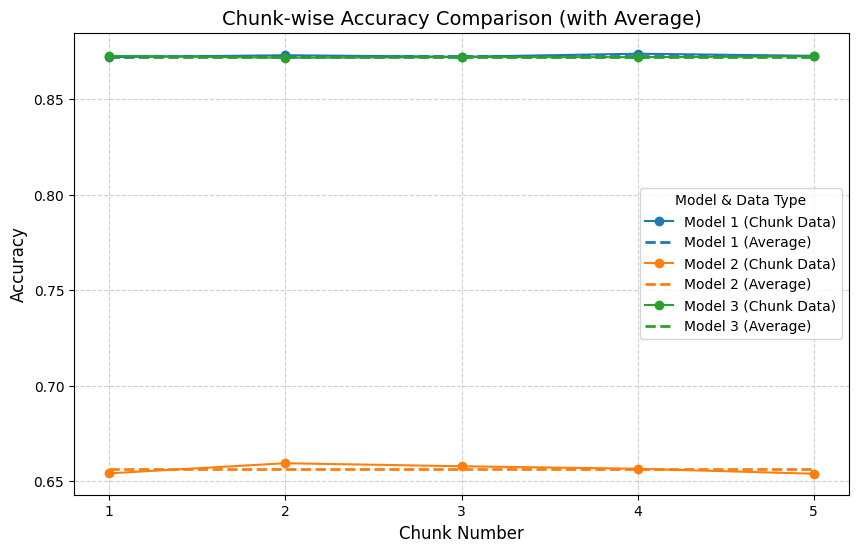

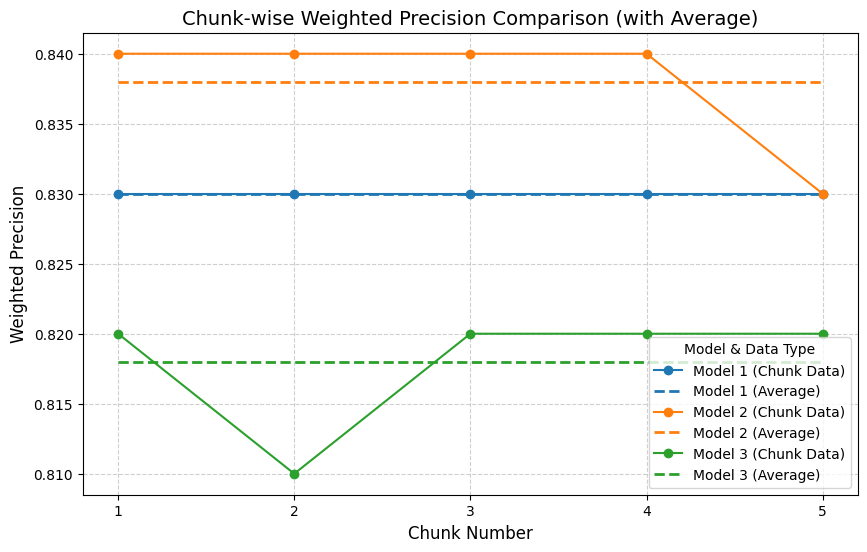

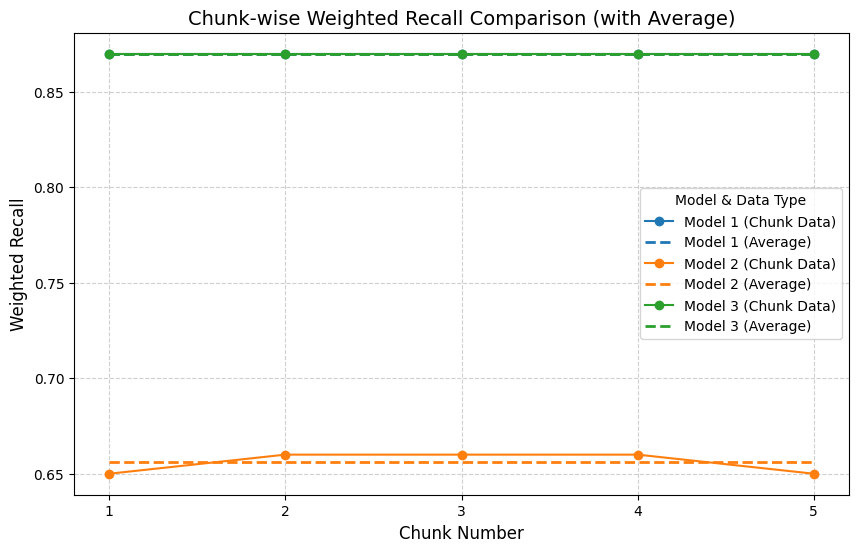

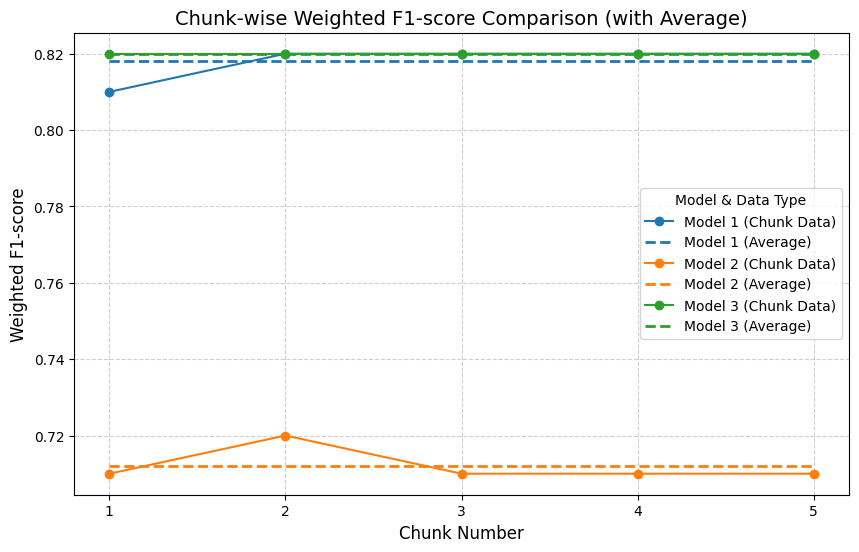

Displayed four graphs (Accuracy, Weighted Precision, Weighted Recall, Weighted F1-score) with average lines using plt.show().


In [ ]:
data = {
    'Chunk': list(range(1, 6)) * 3,
    'Model': ['Model 1'] * 5 + ['Model 2'] * 5 + ['Model 3'] * 5,
    'Accuracy': [
        0.8720, 0.8730, 0.8722, 0.8738, 0.8727,
        0.6541, 0.6594, 0.6578, 0.6565, 0.6539,
        0.8727, 0.8717, 0.8720, 0.8720, 0.8724
    ],
    'Weighted Precision': [
        0.83, 0.83, 0.83, 0.83, 0.83,
        0.84, 0.84, 0.84, 0.84, 0.83,
        0.82, 0.81, 0.82, 0.82, 0.82
    ],
    'Weighted Recall': [
        0.87, 0.87, 0.87, 0.87, 0.87,
        0.65, 0.66, 0.66, 0.66, 0.65,
        0.87, 0.87, 0.87, 0.87, 0.87
    ],
    'Weighted F1-score': [
        0.81, 0.82, 0.82, 0.82, 0.82,
        0.71, 0.72, 0.71, 0.71, 0.71,
        0.82, 0.82, 0.82, 0.82, 0.82
    ]
}
df = pd.DataFrame(data)
average_metrics = df.groupby('Model').mean().drop(columns='Chunk')
metrics = ['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1-score']
model_names = df['Model'].unique()
model_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_map = dict(zip(model_names, model_colors))
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for model in model_names:
        model_data = df[df['Model'] == model]
        plt.plot(model_data['Chunk'], model_data[metric], marker='o', label=f'{model} (Chunk Data)', color=color_map[model], zorder=3)
        avg_value = average_metrics.loc[model, metric]
        plt.plot([1, 5], [avg_value, avg_value], linestyle='--', color=color_map[model], label=f'{model} (Average)', linewidth=2, zorder=2)
    plt.title(f'Chunk-wise {metric} Comparison (with Average)', fontsize=14)
    plt.xlabel('Chunk Number', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(df['Chunk'].unique())
    plt.grid(True, linestyle='--', alpha=0.6)
    handles, labels = plt.gca().get_legend_handles_labels()
    chunk_handles = [h for h, l in zip(handles, labels) if '(Chunk Data)' in l]
    avg_handles = [h for h, l in zip(handles, labels) if '(Average)' in l]
    chunk_labels = [l for l in labels if '(Chunk Data)' in l]
    avg_labels = [l for l in labels if '(Average)' in l]
    final_handles = []
    final_labels = []
    for model in model_names:
        final_labels.extend([l for l in chunk_labels if model in l])
        final_handles.extend([h for h, l in zip(chunk_handles, chunk_labels) if model in l])
        final_labels.extend([l for l in avg_labels if model in l])
        final_handles.extend([h for h, l in zip(avg_handles, avg_labels) if model in l])
    plt.legend(final_handles, final_labels, title='Model & Data Type', loc='best')
    plt.show()
print("Displayed four graphs (Accuracy, Weighted Precision, Weighted Recall, Weighted F1-score) with average lines using plt.show().")

CHUNK DISTRIBUTION
Chunk 1: 451431 rows
Chunk 2: 451431 rows
Chunk 3: 451431 rows
Chunk 4: 451431 rows
Chunk 5: 451435 rows

TRAINING: Random Forest

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.6546
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77     78821
         1.0       0.22      0.66      0.33     11466

    accuracy                           0.65     90287
   macro avg       0.57      0.66      0.55     90287
weighted avg       0.84      0.65      0.71     90287


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.6540
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77     78786
         1.0       0.22      0.66      0.33     11501

    accuracy                           0.65     90287
   macro avg       0.57      0.66      0.55     90287
weighted avg       0.84      0.65      0.71     90287


=== Training on Chunk 3 ===
Chunk 3 Accura

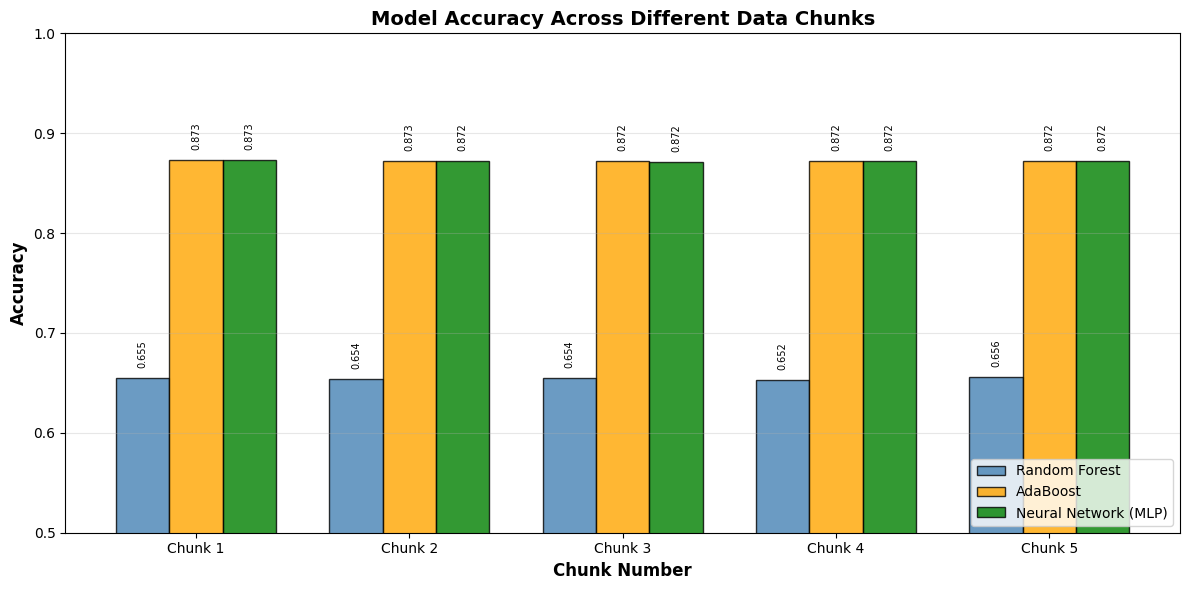

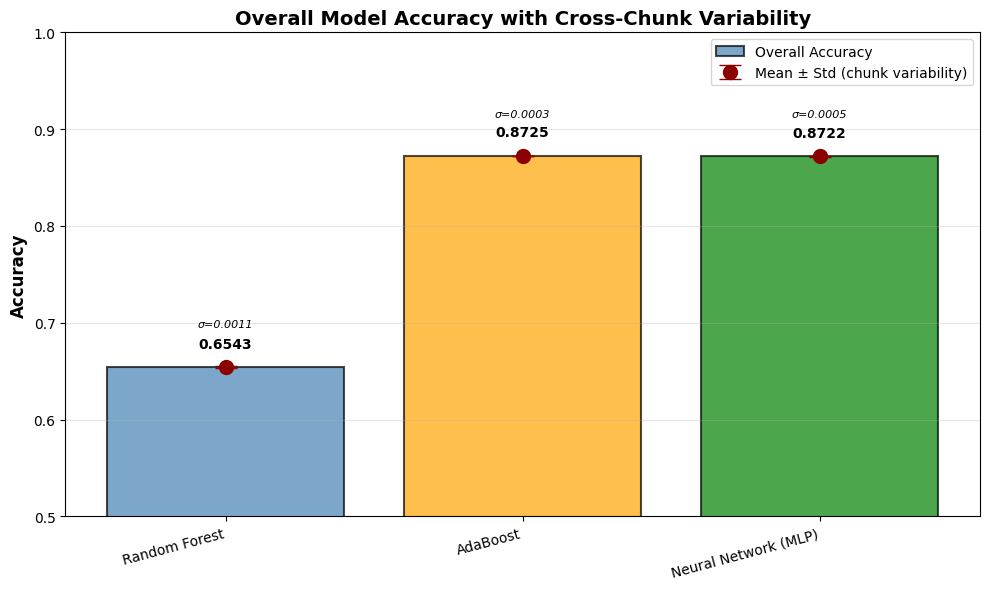

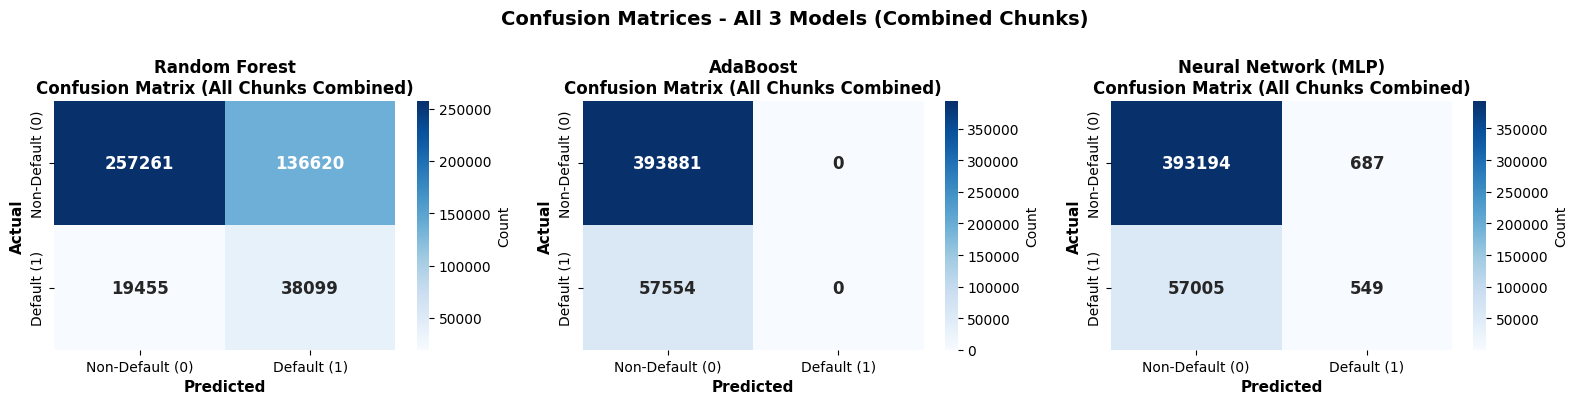

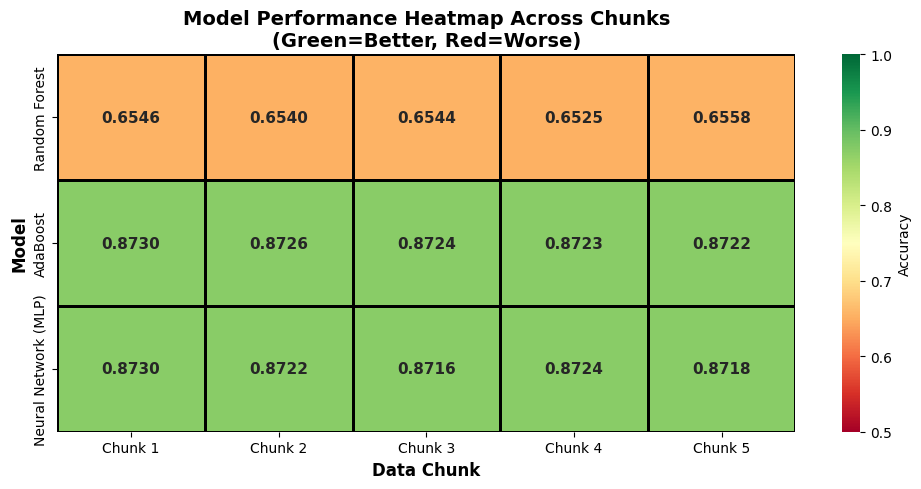

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py", line 104, in json_packer
    ).encode("utf8", errors="surrogateescape")
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'utf-8' codec can't encode characters in position 825-826: surrogates not allowed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/zmq/eventloop/zmqstream.py", line 551, in _run_callback
    f = callback(*args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/iostream.py", line 120, in _handle_event
    event_f()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/iostream.py", line 518, in _flush
    self.session.send(
  File "/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py", line 848, in send
    to

In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.base import clone
import matplotlib.pyplot as plt
import seaborn as sns



df_new_cleaned = df_new_cleaned.sample(frac=1, random_state=13).reset_index(drop=True)

n_chunks = 5
chunk_size = len(df_new_cleaned) // n_chunks
df_chunks = [df_new_cleaned.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]

# Handle remainder
if len(df_new_cleaned) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df_new_cleaned.iloc[n_chunks*chunk_size:]], axis=0)

print("="*80)
print("CHUNK DISTRIBUTION")
print("="*80)
for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")

target_col = "loan_status"


models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=13,
        n_jobs=-1,
        class_weight='balanced'
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,
        random_state=13,
        learning_rate=0.5
    ),
    'Neural Network (MLP)': MLPClassifier(
        hidden_layer_sizes=(100, 50),
        max_iter=500,
        random_state=13,
        early_stopping=True,
        validation_fraction=0.1
    )
}



all_results = {}

for model_name, base_model in models.items():
    print("\n" + "="*80)
    print(f"TRAINING: {model_name}")
    print("="*80)

    chunk_accuracies = []
    all_y_test = []
    all_y_pred = []
    chunk_reports = []

    for i, chunk in enumerate(df_chunks):
        print(f"\n=== Training on Chunk {i+1} ===")

        # Handle missing values (YOUR EXACT PATTERN)
        chunk_copy = chunk.copy()
        for col in chunk_copy.select_dtypes(include=np.number).columns:
            if chunk_copy[col].isnull().any():
                median_val = chunk_copy[col].median()
                chunk_copy[col].fillna(median_val, inplace=True)

        # Prepare features and target (YOUR EXACT PATTERN)
        X = chunk_copy.drop(target_col, axis=1)
        y = chunk_copy[target_col]

        # Train-test split (YOUR EXACT PATTERN)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=13, stratify=y
        )

        # Scale features (YOUR EXACT PATTERN)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train model (clone to create fresh instance per chunk)
        model = clone(base_model)
        model.fit(X_train_scaled, y_train)

        # Predict and evaluate (YOUR EXACT PATTERN)
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        chunk_accuracies.append(acc)

        print(f"Chunk {i+1} Accuracy: {acc:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

        # Store predictions (YOUR EXACT PATTERN)
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)

    # Print chunk accuracies (YOUR EXACT PATTERN)
    for idx, acc in enumerate(chunk_accuracies):
        print(f"Chunk {idx+1} Test Accuracy: {acc:.4f}")

    # Calculate overall accuracy (YOUR EXACT PATTERN)
    overall_acc = accuracy_score(all_y_test, all_y_pred)
    print(f"\n=== Overall Accuracy on all chunks combined: {overall_acc:.4f} ===")

    # Store results for comparison
    all_results[model_name] = {
        'chunk_accuracies': chunk_accuracies,
        'overall_accuracy': overall_acc,
        'all_y_test': all_y_test,
        'all_y_pred': all_y_pred
    }



print("\n\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*80)

comparison_data = []
for model_name, results in all_results.items():
    chunk_accs = results['chunk_accuracies']
    comparison_data.append({
        'Model': model_name,
        'Chunk 1': f"{chunk_accs[0]:.4f}",
        'Chunk 2': f"{chunk_accs[1]:.4f}",
        'Chunk 3': f"{chunk_accs[2]:.4f}",
        'Chunk 4': f"{chunk_accs[3]:.4f}",
        'Chunk 5': f"{chunk_accs[4]:.4f}",
        'Mean': f"{np.mean(chunk_accs):.4f}",
        'Std': f"{np.std(chunk_accs):.4f}",
        'Overall': f"{results['overall_accuracy']:.4f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))



print("\n\n" + "="*80)
print("DETAILED CLASSIFICATION REPORTS - OVERALL PERFORMANCE")
print("="*80)

for model_name, results in all_results.items():
    print(f"\n{model_name}:")
    print("-" * 60)
    print(classification_report(results['all_y_test'], results['all_y_pred']))



fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(1, 6)
width = 0.25

colors = ['steelblue', 'orange', 'green']

for idx, (model_name, results) in enumerate(all_results.items()):
    offset = width * (idx - 1)
    ax.bar(x + offset, results['chunk_accuracies'], width,
           label=model_name, alpha=0.8, edgecolor='black', color=colors[idx])

ax.set_xlabel('Chunk Number', fontweight='bold', fontsize=12)
ax.set_ylabel('Accuracy', fontweight='bold', fontsize=12)
ax.set_title('Model Accuracy Across Different Data Chunks',
             fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels([f'Chunk {i}' for i in range(1, 6)])
ax.legend(fontsize=10, loc='lower right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.5, 1.0])

# Add value labels
for idx, (model_name, results) in enumerate(all_results.items()):
    offset = width * (idx - 1)
    for i, acc in enumerate(results['chunk_accuracies']):
        ax.text(i + 1 + offset, acc + 0.01, f'{acc:.3f}',
               ha='center', va='bottom', fontsize=7, rotation=90)

plt.tight_layout()
plt.show()



fig, ax = plt.subplots(figsize=(10, 6))

model_names = list(all_results.keys())
overall_accs = [all_results[m]['overall_accuracy'] for m in model_names]
chunk_means = [np.mean(all_results[m]['chunk_accuracies']) for m in model_names]
chunk_stds = [np.std(all_results[m]['chunk_accuracies']) for m in model_names]

x_pos = np.arange(len(model_names))

bars = ax.bar(x_pos, overall_accs, alpha=0.7, color=colors,
              edgecolor='black', linewidth=1.5, label='Overall Accuracy')

# Add error bars showing chunk variability
ax.errorbar(x_pos, chunk_means, yerr=chunk_stds, fmt='o',
            color='darkred', markersize=10, capsize=8, linewidth=2.5,
            label='Mean \u00b1 Std (chunk variability)')

ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation=15, ha='right')
ax.set_ylabel('Accuracy', fontweight='bold', fontsize=12)
ax.set_title('Overall Model Accuracy with Cross-Chunk Variability',
             fontweight='bold', fontsize=14)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.5, 1.0])

# Add value labels
for i, (v, m, s) in enumerate(zip(overall_accs, chunk_means, chunk_stds)):
    ax.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=10, fontweight='bold')
    ax.text(i, m + s + 0.04, f'\u03c3={s:.4f}', ha='center', fontsize=8, style='italic')

plt.tight_layout()
plt.show()



fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes = axes.flatten()

for idx, (model_name, results) in enumerate(all_results.items()):
    cm = confusion_matrix(results['all_y_test'], results['all_y_pred'])

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar_kws={'label': 'Count'},
                xticklabels=['Non-Default (0)', 'Default (1)'],
                yticklabels=['Non-Default (0)', 'Default (1)'],
                annot_kws={'fontsize': 12, 'fontweight': 'bold'})
    ax.set_title(f'{model_name}\nConfusion Matrix (All Chunks Combined)',
                fontweight='bold', fontsize=12)
    ax.set_ylabel('Actual', fontweight='bold', fontsize=11)
    ax.set_xlabel('Predicted', fontweight='bold', fontsize=11)

plt.suptitle('Confusion Matrices - All 3 Models (Combined Chunks)',
             fontweight='bold', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()



# Create heatmap data
heatmap_data = []
for model_name in all_results.keys():
    heatmap_data.append(all_results[model_name]['chunk_accuracies'])

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='RdYlGn',
            xticklabels=[f'Chunk {i}' for i in range(1, 6)],
            yticklabels=list(all_results.keys()),
            cbar_kws={'label': 'Accuracy'},
            vmin=0.5, vmax=1.0, ax=ax,
            linewidths=1, linecolor='black',
            annot_kws={'fontsize': 11, 'fontweight': 'bold'})

ax.set_title('Model Performance Heatmap Across Chunks\n(Green=Better, Red=Worse)',
            fontweight='bold', fontsize=14)
ax.set_xlabel('Data Chunk', fontweight='bold', fontsize=12)
ax.set_ylabel('Model', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()



print("\n\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

summary_stats = []
for model_name, results in all_results.items():
    chunk_accs = results['chunk_accuracies']
    summary_stats.append({
        'Model': model_name,
        'Overall Accuracy': f"{results['overall_accuracy']:.4f}",
        'Mean Chunk Acc': f"{np.mean(chunk_accs):.4f}",
        'Std Chunk Acc': f"{np.std(chunk_accs):.4f}",
        'Min Chunk Acc': f"{np.min(chunk_accs):.4f}",
        'Max Chunk Acc': f"{np.max(chunk_accs):.4f}",
        'Range': f"{np.max(chunk_accs) - np.min(chunk_accs):.4f}"
    })

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))



print("\n\n" + "="*80)
print("BEST MODEL IDENTIFICATION")
print("="*80)

best_overall = max(all_results.items(), key=lambda x: x[1]['overall_accuracy'])
best_stable = min(all_results.items(), key=lambda x: np.std(x[1]['chunk_accuracies']))
best_worst_chunk = max(all_results.items(), key=lambda x: np.min(x[1]['chunk_accuracies']))

print(f"\n\uD83C\uDFC6 BEST OVERALL ACCURACY: {best_overall[0]}")
print(f"   Overall Accuracy: {best_overall[1]['overall_accuracy']:.4f}")
print(f"   Mean Chunk Acc: {np.mean(best_overall[1]['chunk_accuracies']):.4f}")
print(f"   Chunk Std Dev: {np.std(best_overall[1]['chunk_accuracies']):.4f}")

print(f"\n\uD83D\uDCCA MOST STABLE MODEL (Lowest Variability): {best_stable[0]}")
print(f"   Overall Accuracy: {best_stable[1]['overall_accuracy']:.4f}")
print(f"   Chunk Std Dev: {np.std(best_stable[1]['chunk_accuracies']):.4f}")
print(f"   Range: {np.max(best_stable[1]['chunk_accuracies']) - np.min(best_stable[1]['chunk_accuracies']):.4f}")

print(f"\n\uD83D\uDCAA BEST WORST-CASE PERFORMANCE: {best_worst_chunk[0]}")
print(f"   Worst Chunk: {np.min(best_worst_chunk[1]['chunk_accuracies']):.4f}")
print(f"   Overall Accuracy: {best_worst_chunk[1]['overall_accuracy']:.4f}")

print("\n" + "="*80)
print("\u2705 ALL 3 MODELS TRAINED AND EVALUATED SUCCESSFULLY!")
print("="*80)


In [ ]:
# ---------------------------------------------------
# 1. Define models (6 models total)
# ---------------------------------------------------
models = {
    "Random Forest (baseline)": RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced",
        random_state=13
    ),
    "Random Forest (tuned)": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        n_jobs=-1,
        class_weight="balanced",
        random_state=13
    ),
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        n_jobs=-1,
        random_state=13
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        scale_pos_weight=1,
        random_state=13,
        n_jobs=-1
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=100,
        learning_rate=0.5,
        random_state=13
    ),
    "Neural Network (MLP)": MLPClassifier(
        hidden_layer_sizes=(100, 50),
        max_iter=500,
        random_state=13,
        early_stopping=True,
        validation_fraction=0.1
    ),
}

# ---------------------------------------------------
# 2. Create chunks from df_new_cleaned
#    (assumes df_new_cleaned already exists and has 'loan_status')
# ---------------------------------------------------
df = df_new_cleaned.sample(frac=1, random_state=13).reset_index(drop=True)
n_chunks = 5
chunk_size = len(df) // n_chunks

df_chunks = [df.iloc[i*chunk_size:(i+1)*chunk_size] for i in range(n_chunks)]
if len(df) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df.iloc[n_chunks*chunk_size:]], axis=0)

print("Chunk sizes:", [len(c) for c in df_chunks])

target_col = "loan_status"

# ---------------------------------------------------
# 3. Storage for all metrics
# ---------------------------------------------------
# nested dict: results[model_name][chunk_idx] = classification_report (dict form)
results = {name: {} for name in models.keys()}

# also store aggregated y_true / y_pred per model for global metrics if needed
agg_y_true = {name: [] for name in models.keys()}
agg_y_pred = {name: [] for name in models.keys()}

# ---------------------------------------------------
# 4. Loop over models and chunks
# ---------------------------------------------------
from sklearn.metrics import classification_report

for model_name, base_model in models.items():
    print("\n" + "="*80)
    print(f"TRAINING MODEL: {model_name}")
    print("="*80)

    for i, chunk in enumerate(df_chunks, start=1):
        print(f"\n--- Chunk {i} ---")

        # Copy to avoid modifying the original chunk
        chunk_copy = chunk.copy()

        # Handle missing numeric values via median
        num_cols = chunk_copy.select_dtypes(include=np.number).columns
        for col in num_cols:
            if chunk_copy[col].isnull().any():
                chunk_copy[col] = chunk_copy[col].fillna(chunk_copy[col].median())

        # Split into X, y
        X = chunk_copy.drop(columns=[target_col])
        y = chunk_copy[target_col]

        # Train-test split with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.2,
            random_state=13,
            stratify=y
        )

        # Scale features for models that need it
        # (LR, XGB, AdaBoost, MLP – you can decide RF needs scaling or not;
        #  here we scale everything for simplicity)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Clone model for each chunk
        model = clone(base_model)
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)

        # classification_report with dict_output=True so we can access precision/recall/F1/support
        report = classification_report(
            y_test,
            y_pred,
            output_dict=True
        )

        # store
        results[model_name][i] = report
        agg_y_true[model_name].extend(y_test)
        agg_y_pred[model_name].extend(y_pred)

        print(f"Chunk {i} classification report:")
        print(classification_report(y_test, y_pred))

# ---------------------------------------------------
# 5. Build a nice summary table (precision, recall, F1, support)
#    Example: default class (label '1') per chunk per model
# ---------------------------------------------------
summary_rows = []

for model_name, chunks_dict in results.items():
    for chunk_idx, rep in chunks_dict.items():
        # assuming binary labels 0 and 1; adjust key if your default label is different
        default_metrics = rep.get("1", {})
        summary_rows.append({
            "Model": model_name,
            "Chunk": chunk_idx,
            "Precision_default": default_metrics.get("precision", np.nan),
            "Recall_default": default_metrics.get("recall", np.nan),
            "F1_default": default_metrics.get("f1-score", np.nan),
            "Support_default": default_metrics.get("support", np.nan),
        })

summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df.sort_values(["Model", "Chunk"]).reset_index(drop=True)
print("\n=== Chunk-wise Precision / Recall / F1 / Support for Default Class (label=1) ===")
print(summary_df.to_string(index=False))

# ---------------------------------------------------
# 6. Optional: overall report per model (all chunks combined)
# ---------------------------------------------------
overall_rows = []

for model_name in models.keys():
    overall_rep = classification_report(
        agg_y_true[model_name],
        agg_y_pred[model_name],
        output_dict=True
    )
    default_overall = overall_rep.get("1", {})
    overall_rows.append({
        "Model": model_name,
        "Precision_default": default_overall.get("precision", np.nan),
        "Recall_default": default_overall.get("recall", np.nan),
        "F1_default": default_overall.get("f1-score", np.nan),
        "Support_default": default_overall.get("support", np.nan),
    })

overall_df = pd.DataFrame(overall_rows)
print("\n=== Overall Precision / Recall / F1 / Support for Default Class (all chunks combined) ===")
print(overall_df.to_string(index=False))

Chunk sizes: [451431, 451431, 451431, 451431, 451435]

TRAINING MODEL: Random Forest (baseline)

--- Chunk 1 ---
Chunk 1 classification report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78770
         1.0       0.44      0.01      0.03     11517

    accuracy                           0.87     90287
   macro avg       0.66      0.51      0.48     90287
weighted avg       0.82      0.87      0.82     90287


--- Chunk 2 ---
Chunk 2 classification report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78790
         1.0       0.45      0.01      0.03     11497

    accuracy                           0.87     90287
   macro avg       0.66      0.51      0.48     90287
weighted avg       0.82      0.87      0.82     90287


--- Chunk 3 ---
Chunk 3 classification report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     788

In [ ]:
overall_weighted_rows = []

for model_name in results.keys():
    overall_rep = classification_report(
        agg_y_true[model_name],
        agg_y_pred[model_name],
        output_dict=True
    )

    # "weighted avg" row: precision, recall, f1-score, support
    wa = overall_rep["weighted avg"]

    overall_weighted_rows.append({
        "Model": model_name,
        "Weighted_Precision": wa["precision"],
        "Weighted_Recall": wa["recall"],
        "Weighted_F1": wa["f1-score"],
        "Weighted_Support": wa["support"],
    })

overall_weighted_df = pd.DataFrame(overall_weighted_rows)
print("\n=== Overall WEIGHTED AVG metrics (all chunks combined) ===")
print(overall_weighted_df.to_string(index=False))


=== Overall WEIGHTED AVG metrics (all chunks combined) ===
                   Model  Weighted_Precision  Weighted_Recall  Weighted_F1  Weighted_Support
Random Forest (baseline)            0.819192         0.872123     0.815933          451435.0
   Random Forest (tuned)            0.840150         0.655835     0.712565          451435.0
     Logistic Regression            0.836534         0.656586     0.712995          451435.0
                 XGBoost            0.825882         0.872507     0.815761          451435.0
                AdaBoost            0.761272         0.872509     0.813103          451435.0
    Neural Network (MLP)            0.821622         0.872396     0.814683          451435.0


In [ ]:
# results[model_name][chunk_idx] already contains output_dict=True reports

weighted_rows = []

for model_name, chunks_dict in results.items():
    for chunk_idx, rep in chunks_dict.items():
        # In your reports the key is exactly "weighted avg"
        wa = rep.get("weighted avg", None)

        if wa is not None:
            weighted_rows.append({
                "Model": model_name,
                "Chunk": chunk_idx,
                "Weighted_Precision": wa["precision"],
                "Weighted_Recall": wa["recall"],
                "Weighted_F1": wa["f1-score"],
                "Weighted_Support": wa["support"],
            })
        else:
            weighted_rows.append({
                "Model": model_name,
                "Chunk": chunk_idx,
                "Weighted_Precision": np.nan,
                "Weighted_Recall": np.nan,
                "Weighted_F1": np.nan,
                "Weighted_Support": 0,
            })

weighted_chunk_df = pd.DataFrame(weighted_rows).sort_values(
    ["Model", "Chunk"]
).reset_index(drop=True)

print("\n=== Chunk-wise WEIGHTED AVG metrics (precision, recall, F1, support) ===")
print(weighted_chunk_df.to_string(index=False))


=== Chunk-wise WEIGHTED AVG metrics (precision, recall, F1, support) ===
                   Model  Chunk  Weighted_Precision  Weighted_Recall  Weighted_F1  Weighted_Support
                AdaBoost      1            0.761152         0.872440     0.813005           90287.0
                AdaBoost      2            0.761538         0.872662     0.813322           90287.0
                AdaBoost      3            0.761809         0.872817     0.813544           90287.0
                AdaBoost      4            0.760186         0.871886     0.812214           90287.0
                AdaBoost      5            0.761674         0.872739     0.813433           90287.0
     Logistic Regression      1            0.836021         0.656019     0.712496           90287.0
     Logistic Regression      2            0.836224         0.657271     0.713573           90287.0
     Logistic Regression      3            0.835788         0.656584     0.713062           90287.0
     Logistic Regression  

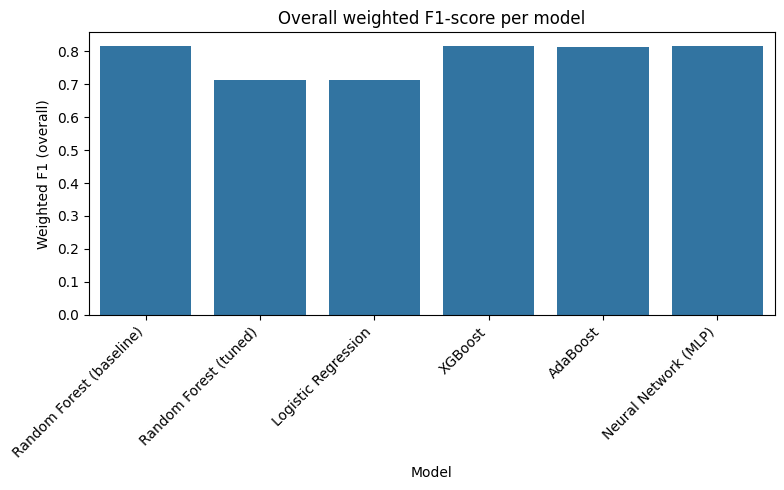

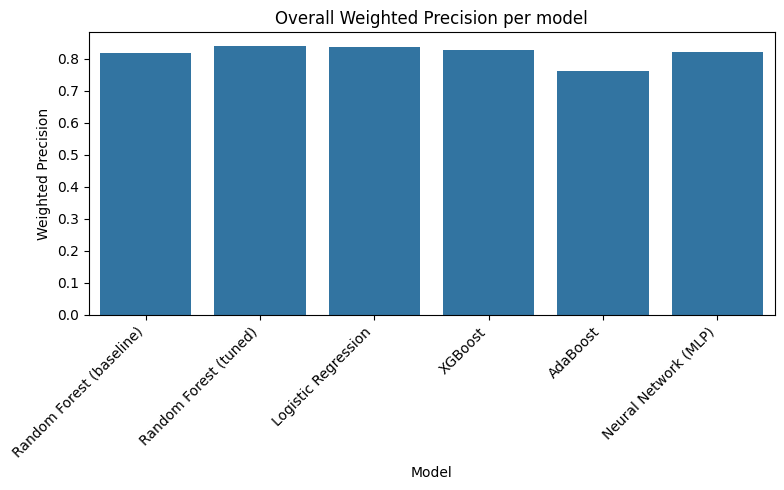

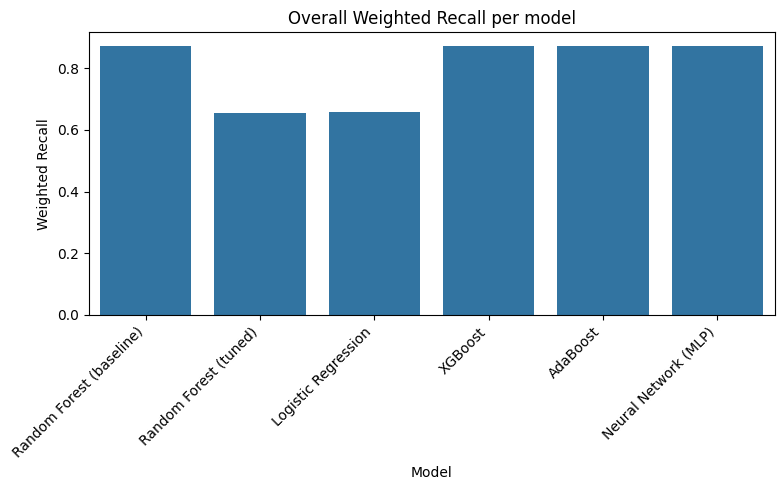

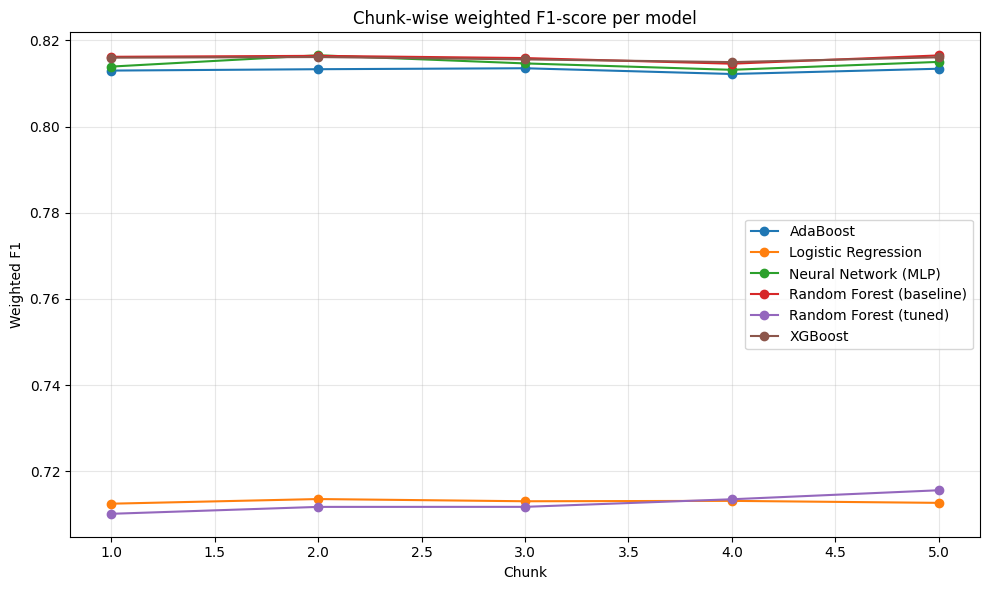

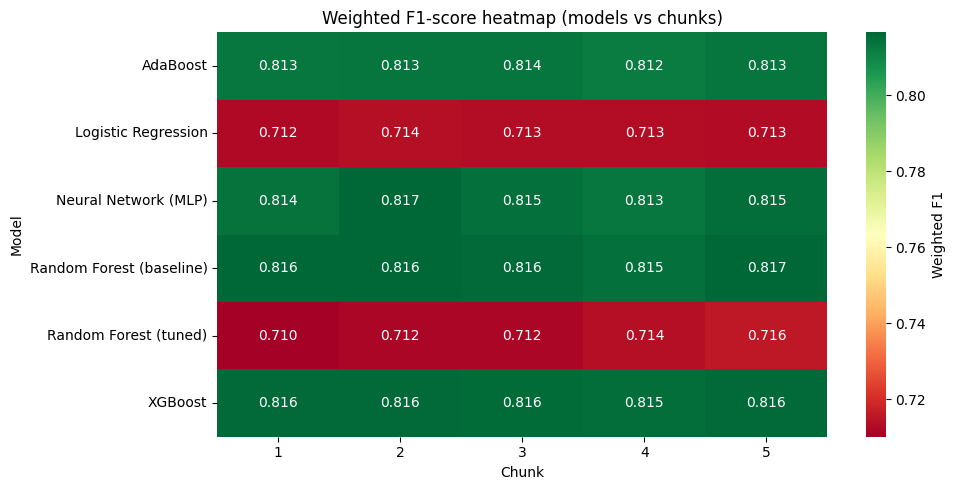

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Overall weighted scores per model (bar chart)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=overall_weighted_df,
    x="Model",
    y="Weighted_F1"
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Weighted F1 (overall)")
plt.title("Overall weighted F1-score per model")
plt.tight_layout()
plt.show()

# You can repeat for precision/recall:
for metric in ["Weighted_Precision", "Weighted_Recall"]:
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=overall_weighted_df,
        x="Model",
        y=metric
    )
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(metric.replace("_", " "))
    plt.title(f"Overall {metric.replace('_', ' ')} per model")
    plt.tight_layout()
    plt.show()

# 2) Chunk-wise weighted F1 per model (line plot)
plt.figure(figsize=(10, 6))
for model in weighted_chunk_df["Model"].unique():
    sub = weighted_chunk_df[weighted_chunk_df["Model"] == model]
    plt.plot(
        sub["Chunk"],
        sub["Weighted_F1"],
        marker="o",
        label=model
    )

plt.xlabel("Chunk")
plt.ylabel("Weighted F1")
plt.title("Chunk-wise weighted F1-score per model")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3) Chunk-wise weighted F1 heatmap (models x chunks)
pivot_f1 = weighted_chunk_df.pivot(
    index="Model",
    columns="Chunk",
    values="Weighted_F1"
)

plt.figure(figsize=(10, 5))
sns.heatmap(
    pivot_f1,
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",
    cbar_kws={"label": "Weighted F1"}
)
plt.title("Weighted F1-score heatmap (models vs chunks)")
plt.ylabel("Model")
plt.xlabel("Chunk")
plt.tight_layout()
plt.show()


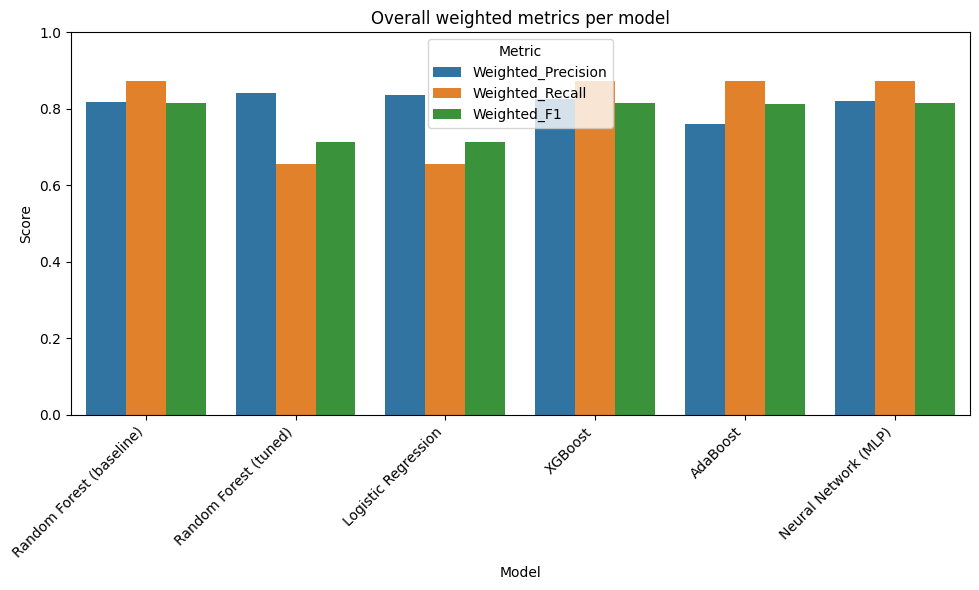

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ["Weighted_Precision", "Weighted_Recall", "Weighted_F1"]

melt_overall = overall_weighted_df.melt(
    id_vars="Model",
    value_vars=metrics,
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=melt_overall,
    x="Model",
    y="Score",
    hue="Metric"
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Overall weighted metrics per model")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


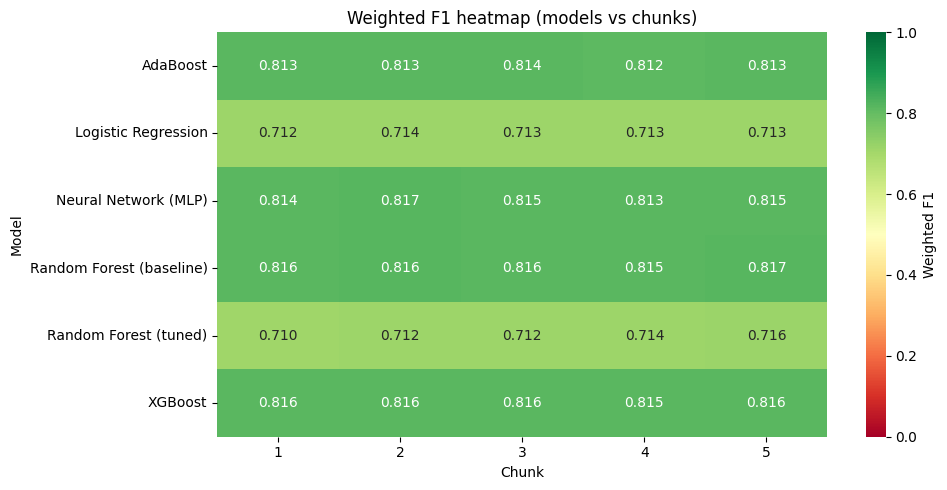

In [ ]:
pivot_f1 = weighted_chunk_df.pivot(
    index="Model",
    columns="Chunk",
    values="Weighted_F1"
)

plt.figure(figsize=(10, 5))
sns.heatmap(
    pivot_f1,
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",
    cbar_kws={"label": "Weighted F1"},
    vmin=0, vmax=1
)
plt.title("Weighted F1 heatmap (models vs chunks)")
plt.ylabel("Model")
plt.xlabel("Chunk")
plt.tight_layout()
plt.show()


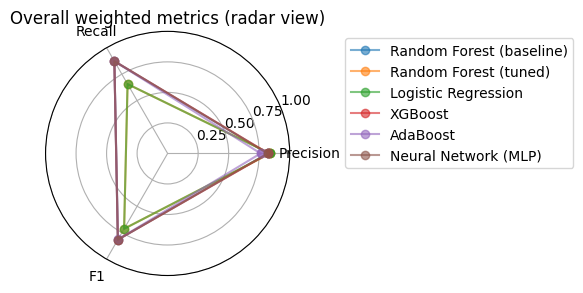

In [ ]:
import numpy as np

metrics = ["Weighted_Precision", "Weighted_Recall", "Weighted_F1"]
labels = ["Precision", "Recall", "F1"]
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

plt.figure(figsize=(6, 6))
for _, row in overall_weighted_df.iterrows():
    values = row[metrics].values
    values = np.concatenate((values, [values[0]]))
    plt.polar(angles, values, marker="o", label=row["Model"], alpha=0.6)

plt.xticks(angles[:-1], labels)
plt.yticks([0.25, 0.5, 0.75, 1.0])
plt.title("Overall weighted metrics (radar view)")
plt.legend(bbox_to_anchor=(1.2, 1), loc="upper left")
plt.tight_layout()
plt.show()


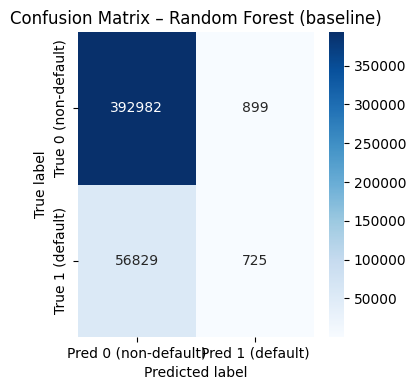

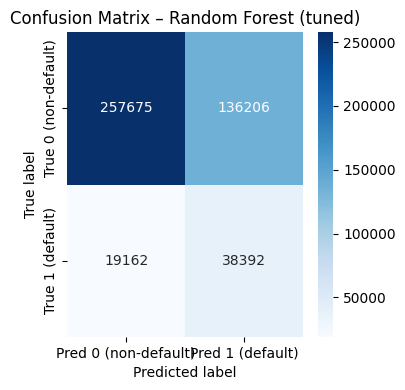

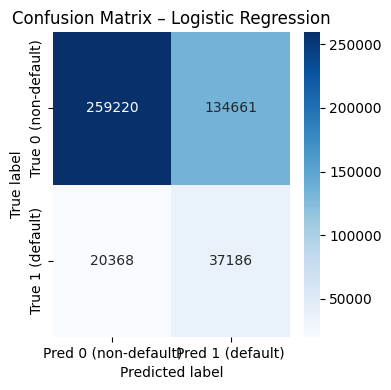

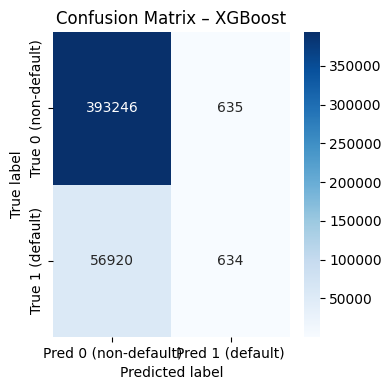

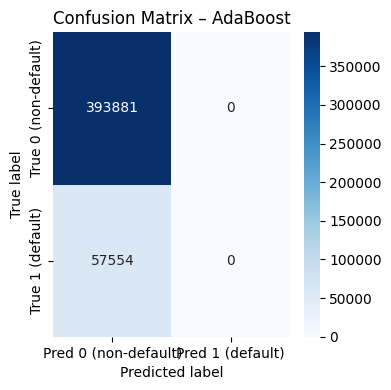

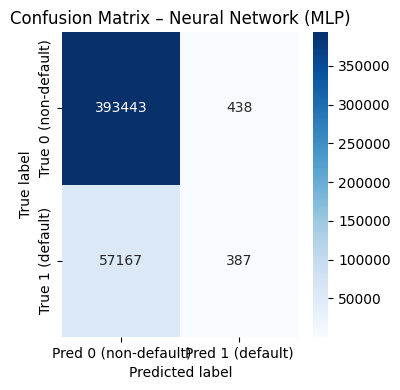

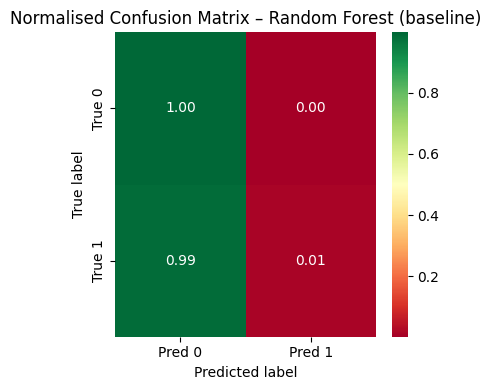

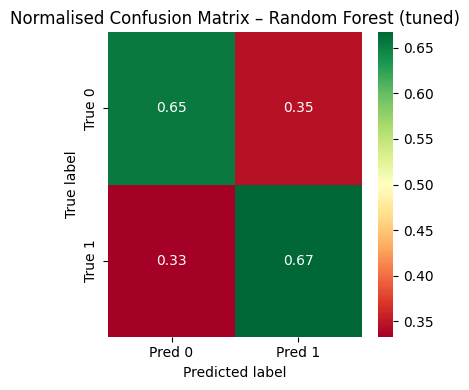

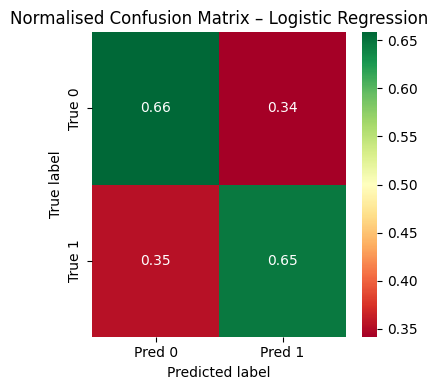

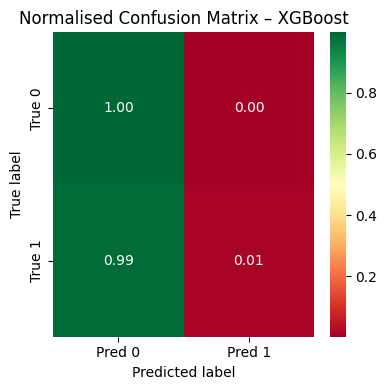

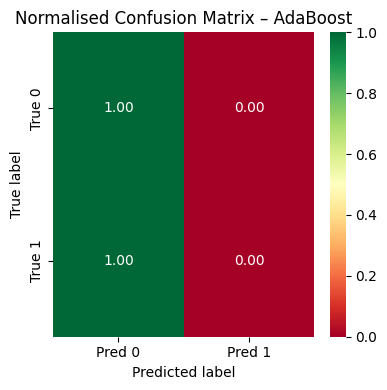

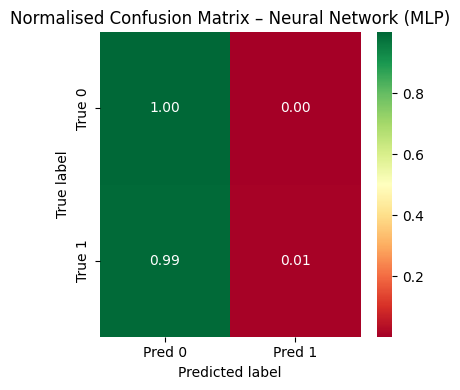

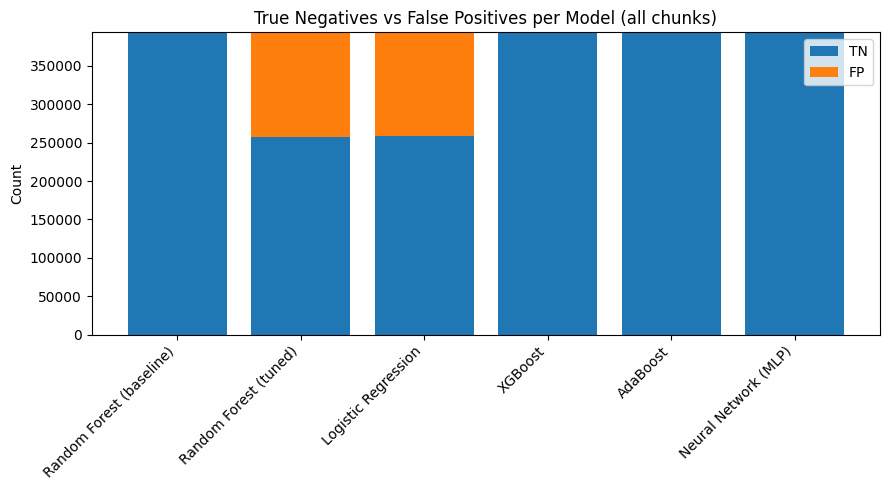

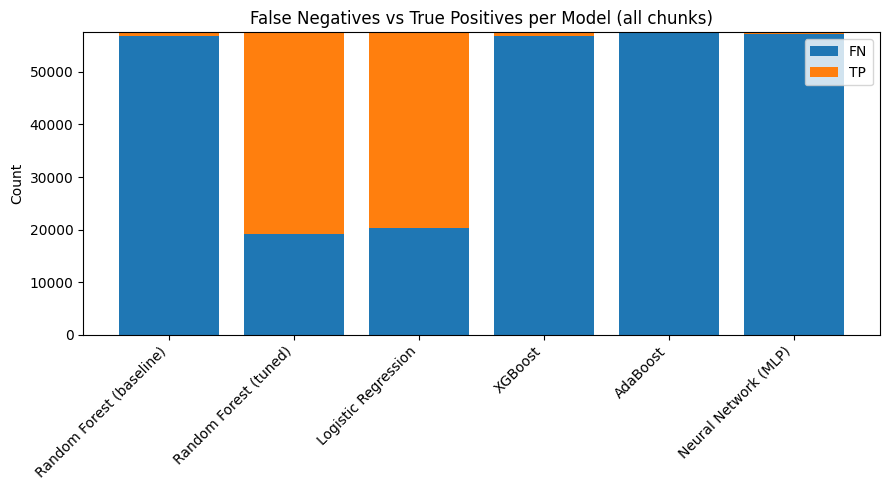

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models_list = list(results.keys())  # same keys you used before

# 1) Standard confusion-matrix heatmap per model
for model_name in models_list:
    y_true = agg_y_true[model_name]
    y_pred = agg_y_pred[model_name]

    cm = confusion_matrix(y_true, y_pred, labels=[0.0, 1.0])

    plt.figure(figsize=(4, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Pred 0 (non-default)", "Pred 1 (default)"],
        yticklabels=["True 0 (non-default)", "True 1 (default)"]
    )
    plt.title(f"Confusion Matrix – {model_name}")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

# 2) Normalised confusion matrix (shows proportions, highlights FP/FN rates)
for model_name in models_list:
    y_true = agg_y_true[model_name]
    y_pred = agg_y_pred[model_name]

    cm = confusion_matrix(y_true, y_pred, labels=[0.0, 1.0])
    cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

    plt.figure(figsize=(4, 4))
    sns.heatmap(
        cm_norm,
        annot=True,
        fmt=".2f",
        cmap="RdYlGn",
        xticklabels=["Pred 0", "Pred 1"],
        yticklabels=["True 0", "True 1"]
    )
    plt.title(f"Normalised Confusion Matrix – {model_name}")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

# 3) Bar chart of TN, FP, FN, TP per model
import numpy as np

bars = []
for model_name in models_list:
    y_true = np.array(agg_y_true[model_name])
    y_pred = np.array(agg_y_pred[model_name])

    cm = confusion_matrix(y_true, y_pred, labels=[0.0, 1.0])
    tn, fp, fn, tp = cm.ravel()

    bars.append({
        "Model": model_name,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    })

tn_fp_fn_tp_df = pd.DataFrame(bars)

# Stacked bar: TN vs FP (focus on non-default class behaviour)
plt.figure(figsize=(9, 5))
bottom = np.zeros(len(tn_fp_fn_tp_df))
for comp in ["TN", "FP"]:
    plt.bar(
        tn_fp_fn_tp_df["Model"],
        tn_fp_fn_tp_df[comp],
        bottom=bottom,
        label=comp
    )
    bottom += tn_fp_fn_tp_df[comp].values

plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.title("True Negatives vs False Positives per Model (all chunks)")
plt.legend()
plt.tight_layout()
plt.show()

# 4) Separate bar chart for FN vs TP (default class behaviour)
plt.figure(figsize=(9, 5))
bottom = np.zeros(len(tn_fp_fn_tp_df))
for comp in ["FN", "TP"]:
    plt.bar(
        tn_fp_fn_tp_df["Model"],
        tn_fp_fn_tp_df[comp],
        bottom=bottom,
        label=comp
    )
    bottom += tn_fp_fn_tp_df[comp].values

plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.title("False Negatives vs True Positives per Model (all chunks)")
plt.legend()
plt.tight_layout()
plt.show()


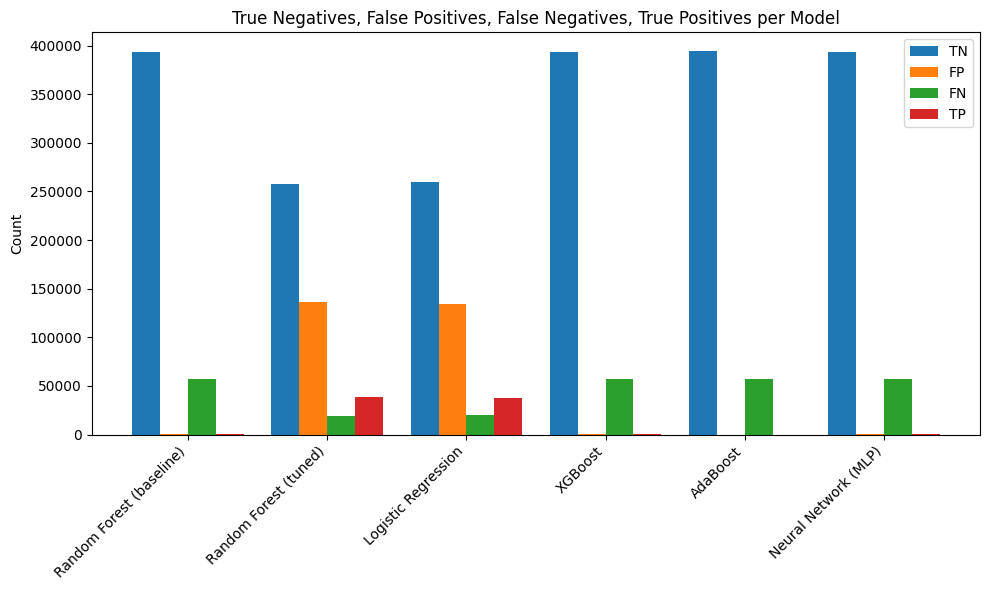

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1) Build a table of TN, FP, FN, TP per model
rows = []
for model_name in models_list:
    y_true = np.array(agg_y_true[model_name])
    y_pred = np.array(agg_y_pred[model_name])

    cm = confusion_matrix(y_true, y_pred, labels=[0.0, 1.0])
    tn, fp, fn, tp = cm.ravel()

    rows.append({
        "Model": model_name,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    })

cm_df = pd.DataFrame(rows)

# 2) Grouped bar plot: TN, FP, FN, TP for each model
components = ["TN", "FP", "FN", "TP"]
x = np.arange(len(cm_df))          # one position per model
width = 0.2                        # width of each bar

plt.figure(figsize=(10, 6))

for i, comp in enumerate(components):
    plt.bar(
        x + i*width,
        cm_df[comp],
        width=width,
        label=comp
    )

plt.xticks(x + width*1.5, cm_df["Model"], rotation=45, ha="right")
plt.ylabel("Count")
plt.title("True Negatives, False Positives, False Negatives, True Positives per Model")
plt.legend()
plt.tight_layout()
plt.show()


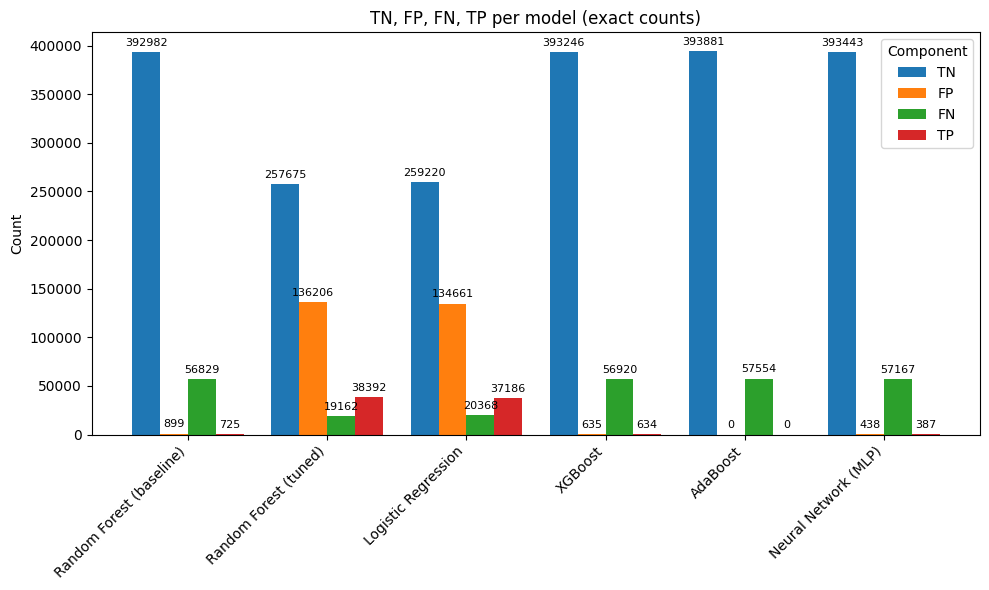

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

components = ["TN", "FP", "FN", "TP"]
x = np.arange(len(cm_df))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

bars = []
for i, comp in enumerate(components):
    b = ax.bar(
        x + i * width,
        cm_df[comp],
        width=width,
        label=comp
    )
    bars.append(b)

# Add exact number labels on top of each bar
for b in bars:
    for bar in b:
        height = bar.get_height()
        ax.annotate(
            f"{int(height)}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=8
        )

ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(cm_df["Model"], rotation=45, ha="right")
ax.set_ylabel("Count")
ax.set_title("TN, FP, FN, TP per model (exact counts)")
ax.legend(title="Component")
fig.tight_layout()
plt.show()
